In [32]:
import hyperloglog
import random
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:


# # Set of m values to test
# m_values = [100, 500, 1000, 2000, 5000, 10000]

# # Store results
# results = []

# # Generate a random string
# def random_string(length=30):
#     return ''.join(random.choices(string.ascii_letters, k=length))

# # Run experiments
# for m in m_values:
#     for run in range(100):
#         hll = hyperloglog.HyperLogLog(0.01)  # 1% error rate
#         for _ in range(m):
#             hll.add(random_string())
#         results.append({"true_count": m, "estimated_count": len(hll)})

# # Convert results to DataFrame
# df = pd.DataFrame(results)

# # Plot using seaborn
# plt.figure(figsize=(12, 6))
# sns.boxplot(x="true_count", y="estimated_count", data=df)
# plt.title("HyperLogLog Estimated Count vs True Count")
# plt.xlabel("Number of Unique Elements Added (m)")
# plt.ylabel("Estimated Cardinality by HLL")
# plt.grid(True)
# plt.show()


In [40]:
m_values = [100, 500, 1000, 2000, 5000, 10000]
num_runs = 100

In [41]:

error_data = []

# Random string generator
def random_string(length=30):
    return ''.join(random.choices(string.ascii_letters, k=length))

# Run trials and collect error statistics
for m in m_values:
    errors = []
    for _ in range(num_runs):
        hll = hyperloglog.HyperLogLog(0.01)  # 1% error
        for _ in range(m):
            hll.add(random_string())
        est = len(hll)
        errors.append(abs(est - m))
    avg_error = np.mean(errors)
    std_error = np.std(errors)
    error_data.append({"m": m, "avg_abs_error": avg_error, "std_error": std_error})

# Convert to DataFrame
df_error = pd.DataFrame(error_data)

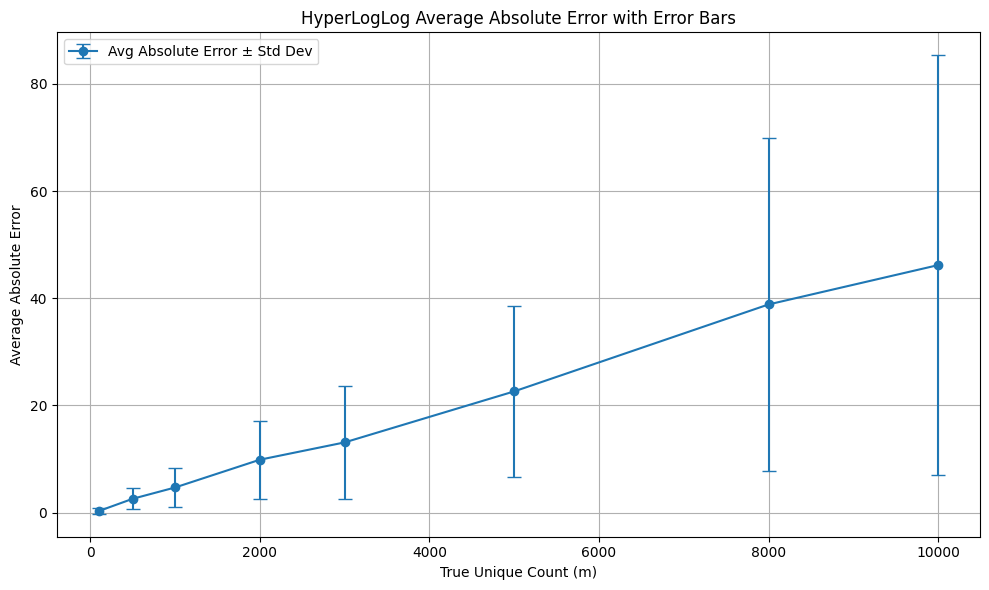

In [42]:
plt.figure(figsize=(10, 6))
plt.errorbar(df_error["m"], df_error["avg_abs_error"], yerr=df_error["std_error"],
             fmt='-o', capsize=5, label="Avg Absolute Error ± Std Dev")

plt.title("HyperLogLog Average Absolute Error with Error Bars")
plt.xlabel("True Unique Count (m)")
plt.ylabel("Average Absolute Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()